In [1]:
import os
import mokapot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path =  "~/Payne_Lab/SingleCellBenchMark/data/maxquant/msmsScans.txt.gz"
mq_df =  pd.read_csv(path, sep = "\t")

In [3]:
#Working with only the 2ng data
mq_df = mq_df.loc[mq_df['Raw file'] == 'Ex_Auto_DrM3_30umT4_2ngQC_60m_half']
mq_df

,Raw file,Scan number,Retention time,Ion injection time,Total ion current,Collision energy,Summations,Base peak intensity,Elapsed time,Identified,...,PEP,Reporter PIF,Reporter fraction,Intens Comp Factor,CTCD Comp,RawOvFtT,AGC Fill,Scan index,MS scan index,MS scan number
19243,Ex_Auto_DrM3_30umT4_2ngQC_60m_half,5,0.023082,118.0,63371.0,30,0,13301.00,NaN,-,...,0.289592,NaN,NaN,NaN,NaN,20477.6,0.02,0,3,4
19244,Ex_Auto_DrM3_30umT4_2ngQC_60m_half,6,0.025248,118.0,14316.0,30,0,1208.20,NaN,-,...,0.296596,NaN,NaN,NaN,NaN,14032.8,0.01,1,3,4
19245,Ex_Auto_DrM3_30umT4_2ngQC_60m_half,7,0.027413,118.0,28011.0,30,0,1306.20,NaN,-,...,1.773420,NaN,NaN,NaN,NaN,13562.1,0.01,2,3,4
19246,Ex_Auto_DrM3_30umT4_2ngQC_60m_half,8,0.029578,118.0,6289.4,30,0,919.52,NaN,-,...,0.112992,NaN,NaN,NaN,NaN,13753.8,0.01,3,3,4
19247,Ex_Auto_DrM3_30umT4_2ngQC_60m_half,9,0.031744,118.0,168640.0,30,0,81090.00,NaN,-,...,0.175843,NaN,NaN,NaN,NaN,41233.3,0.07,4,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59385,Ex_Auto_DrM3_30umT4_2ngQC_60m_half,49333,129.900000,118.0,37543.0,30,0,3505.80,NaN,-,...,0.098582,NaN,NaN,NaN,NaN,18770.3,0.02,40142,9189,49332
59386,Ex_Auto_DrM3_30umT4_2ngQC_60m_half,49335,129.900000,118.0,47816.0,30,0,10350.00,NaN,-,...,NaN,NaN,NaN,NaN,NaN,20691.8,0.01,40143,9190,49334
59387,Ex_Auto_DrM3_30umT4_2ngQC_60m_half,49342,129.940000,118.0,188750.0,30,0,94807.00,NaN,-,...,0.281515,NaN,NaN,NaN,NaN,42280.5,0.02,40144,9196,49341
59388,Ex_Auto_DrM3_30umT4_2ngQC_60m_half,49347,129.960000,118.0,36041.0,30,0,4857.90,NaN,-,...,NaN,NaN,NaN,NaN,NaN,16378.4,0.01,40145,9200,49346


In [4]:
def make_decoy_col_maxquant(row):
    if row["Proteins"].startswith("REV"):
        return False
    else:
        return True

In [5]:
def format_oxidation(row, column, to_replace):
    peptide = row[column]
#     print(to_replace)
    replace_with = "+15.995"
    if pd.isna(peptide):
        new_pep = peptide
    else:
        if to_replace in peptide:
            new_pep = peptide.replace(to_replace, replace_with)
        else:
            new_pep = peptide
    return new_pep

In [6]:
mq_df["target_column"] = mq_df.apply(make_decoy_col_maxquant, axis = 1)
mq_df['peptide'] = mq_df.apply(lambda row: format_oxidation(row, "Modified sequence", "(Oxidation (M))"), axis=1)

In [16]:
mq_df

,Scan number,Retention time,Ion injection time,Total ion current,Collision energy,Summations,Base peak intensity,Elapsed time,Matched,Reverse,...,Reporter fraction,Intens Comp Factor,CTCD Comp,RawOvFtT,AGC Fill,Scan index,MS scan index,MS scan number,target_column,peptide
19243,5,0.023082,118.0,63371.0,30,0,13301.00,NaN,NaN,+,...,NaN,NaN,NaN,20477.6,0.02,0,3,4,False,_DNLCSCCSGM+15.995_
19244,6,0.025248,118.0,14316.0,30,0,1208.20,NaN,NaN,+,...,NaN,NaN,NaN,14032.8,0.01,1,3,4,False,_CSMALWQDVCLQHFLHMCPR_
19245,7,0.027413,118.0,28011.0,30,0,1306.20,NaN,NaN,NaN,...,NaN,NaN,NaN,13562.1,0.01,2,3,4,True,_NEDEDSPNK_
19246,8,0.029578,118.0,6289.4,30,0,919.52,NaN,NaN,+,...,NaN,NaN,NaN,13753.8,0.01,3,3,4,False,_VAHM+15.995YLASLFSAEHTRDSINTSEYEWGK_
19247,9,0.031744,118.0,168640.0,30,0,81090.00,NaN,NaN,NaN,...,NaN,NaN,NaN,41233.3,0.07,4,3,4,True,_VLLPAIKK_
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59385,49333,129.900000,118.0,37543.0,30,0,3505.80,NaN,NaN,+,...,NaN,NaN,NaN,18770.3,0.02,40142,9189,49332,False,_HRFLLIQIR_
59386,49335,129.900000,118.0,47816.0,30,0,10350.00,NaN,NaN,NaN,...,NaN,NaN,NaN,20691.8,0.01,40143,9190,49334,True,
59387,49342,129.940000,118.0,188750.0,30,0,94807.00,NaN,NaN,+,...,NaN,NaN,NaN,42280.5,0.02,40144,9196,49341,False,_GUGGAMPPPSPR_
59388,49347,129.960000,118.0,36041.0,30,0,4857.90,NaN,NaN,NaN,...,NaN,NaN,NaN,16378.4,0.01,40145,9200,49346,True,


In [19]:
len(mq_df[mq_df['PEP'] <= 0.01])

8785

In [8]:
mq_df = mq_df.drop(columns = {
       'Identified', 'Sequence', 'Mass analyzer', 'Modifications','Modified sequence','Type','Fragmentation',
       'Proteins','Raw file'})

In [9]:
mq_df.columns

Index(['Scan number', 'Retention time', 'Ion injection time',
       'Total ion current', 'Collision energy', 'Summations',
       'Base peak intensity', 'Elapsed time', 'Matched', 'Reverse',
       'MS/MS IDs', 'Length', 'Filtered peaks', 'm/z', 'Mass', 'Charge',
       'Parent intensity fraction', 'Fraction of total spectrum',
       'Base peak fraction', 'Precursor full scan number',
       'Precursor intensity', 'Precursor apex fraction',
       'Precursor apex offset', 'Precursor apex offset time',
       'Scan event number', 'Score', 'PEP', 'Reporter PIF',
       'Reporter fraction', 'Intens Comp Factor', 'CTCD Comp', 'RawOvFtT',
       'AGC Fill', 'Scan index', 'MS scan index', 'MS scan number',
       'target_column', 'peptide'],
      dtype='object')

In [10]:
mq_for_MP = mokapot.dataset.LinearPsmDataset(mq_df, target_column = "target_column", spectrum_columns = "Scan number", 
                                             peptide_column = "peptide", protein_column=None, 
                                             group_column=None, feature_columns=None, copy_data=True)

Missing values detected in the following features:
  - Elapsed time
  - Matched
  - Reverse
  - Mass
  - Precursor intensity
  - Precursor apex fraction
  - Precursor apex offset time
  - Score
  - PEP
  - Reporter PIF
  - Reporter fraction
  - Intens Comp Factor
  - CTCD Comp
Dropping features with missing values...


In [11]:
results, models = mokapot.brew(mq_for_MP)
#results.to_txt()

In [14]:
results

A mokapot.confidence.LinearConfidence object:
	- PSMs at q<=0.01: 9066
	- Peptides at q<=0.01: 0

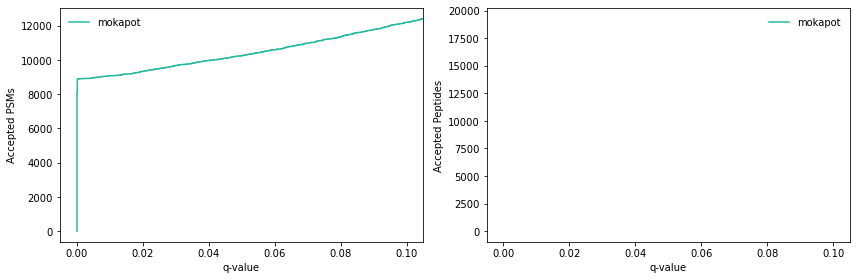

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
colors = ("#343131", "#24B8A0")

# Plot the performance:
for ax, level in zip(axs, results.levels):
    results.plot_qvalues(level=level, c=colors[1], ax=ax,
                           label="mokapot")
    ax.legend(frameon=False)

plt.tight_layout()
plt.show()